In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv 
df = pd.read_csv('gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv')

use the chosen meter-id '28ba7f57-6e83-4341-8078-232c1639e4e3'

In [118]:
#l = list(df['meter_id'].sample(n=5, random_state=1))
df_ = df[df['meter_id']=='28ba7f57-6e83-4341-8078-232c1639e4e3']

In [119]:
df_prod = df_[df_['type'] == 'production']
df_cons = df_[df_['type'] == 'consumption']
df_prod.index = pd.to_datetime(df_prod['timeslot'], utc=True)
df_cons.index = pd.to_datetime(df_cons['timeslot'], utc=True)

Smoothing process

In [125]:
# Centered moving average of timeseries
def moving_average(timeseries, window):
    """Calculate the moving average of a timeseries.

    Args:
        timeseries (pd.Series): timeseries
        window (int): Window size

    Returns:
        pd.Series: Smoothened timeseries
    """
    return timeseries.rolling(window=window, center=True).mean()

def plot_moving_average(timeseries, window=3, plt_title = "Moving average of consumption", y_label="Consumption (kWh)"):
    """Plot moving average of timeseries

    Args:
        timeseries (pd.Series): timeseries
        window (int): Window size
        type (str): Type, consumption or production
    """

    # Clear plot    
    #plt.clf()

    cma = moving_average(timeseries, window)

    #Seaborn style plot
    sns.set(style="darkgrid")

    # # drop nan values in cma
    # cma = cma.dropna()
    # Sort cma by index
    cma = cma.sort_index()
    plt.plot(cma, alpha=0.7)
    # Add plot title
    # plt_title = f"Mo
    # ving average of {type} (Window size {window})"
    plt.title(f"{plt_title} (Window size {window})")
    # Rotate x-axis labels
    plt.xticks(rotation=75)
    plt.figure

    # x-axis label
    plt.xlabel('Time (h)')
    # y-axis label
    plt.ylabel(y_label)
    
    plt.show

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

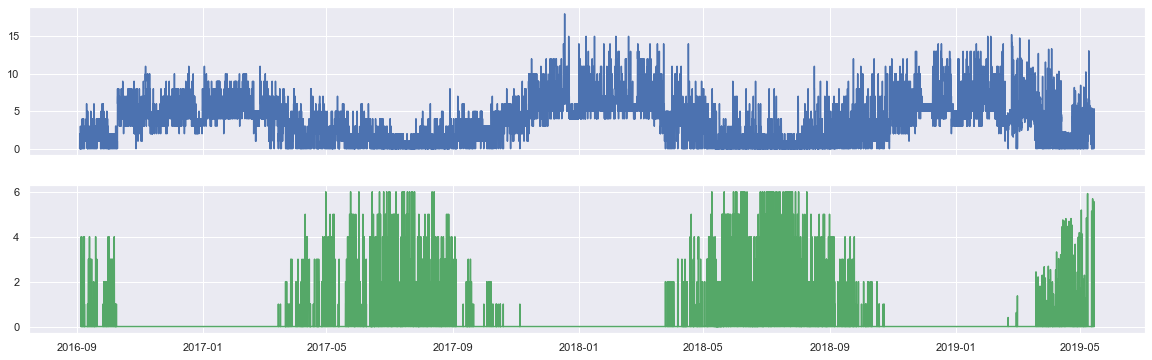

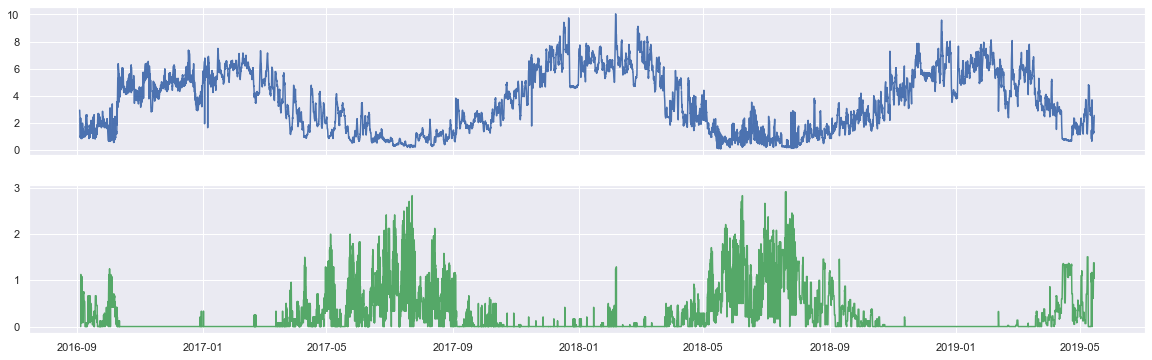

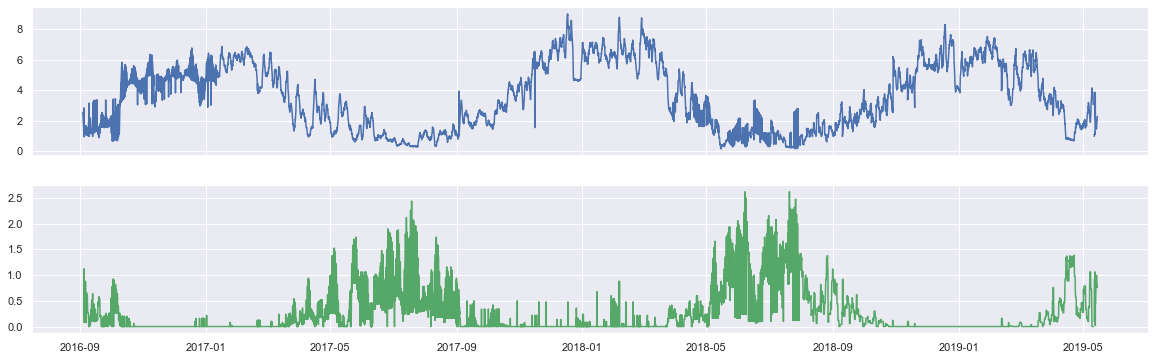

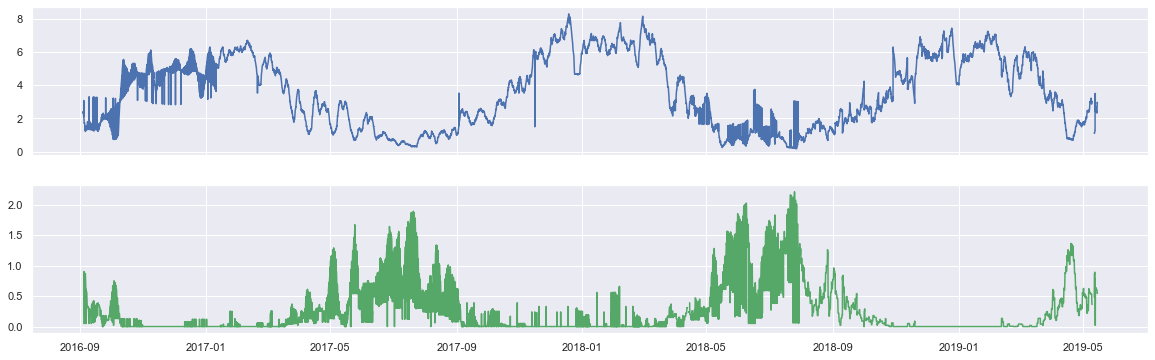

In [140]:
plt.rcParams["figure.figsize"] = (20,6)
sns.set(style="darkgrid")

for window in [1, 24, 50, 100]:
    fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols = 1, sharex=True)
    ax1.plot(moving_average(df_cons['num_kwh'],window).sort_index(), color='b')
    #ax1.title('Centered Moving Average of Consumption, Window Size = ')
    ax2.plot(moving_average(df_prod['num_kwh'],window).sort_index(), color='g')
    #ax2.title('Centered Moving Average of Production, Window Size = ')
plt.plot

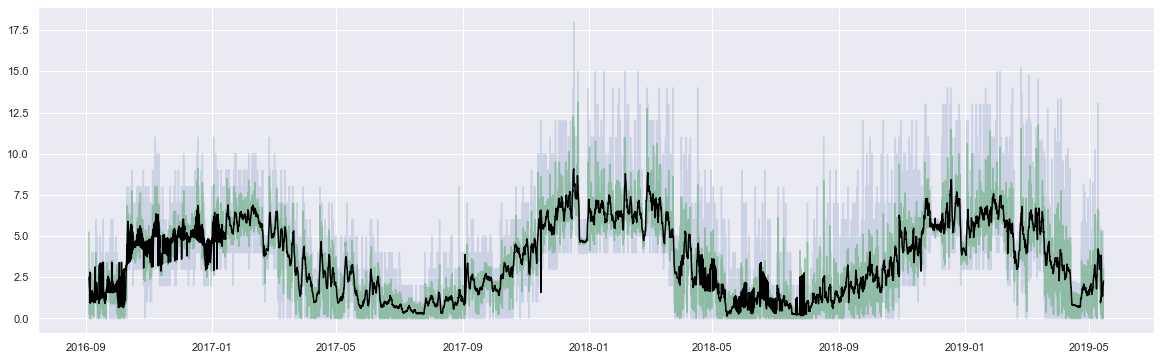

In [161]:
plt.rcParams["figure.figsize"] = (20,6)
sns.set(style="darkgrid")
choices = [1, 8, 48]
a = [0.2,0.5,1]
colors = ['b','g','black']
for i in range(3):
    window=choices[i]
    plt.plot(moving_average(df_cons['num_kwh'],window).sort_index(), color=colors[i], alpha=a[i])
    plt.title('')
plt.legend

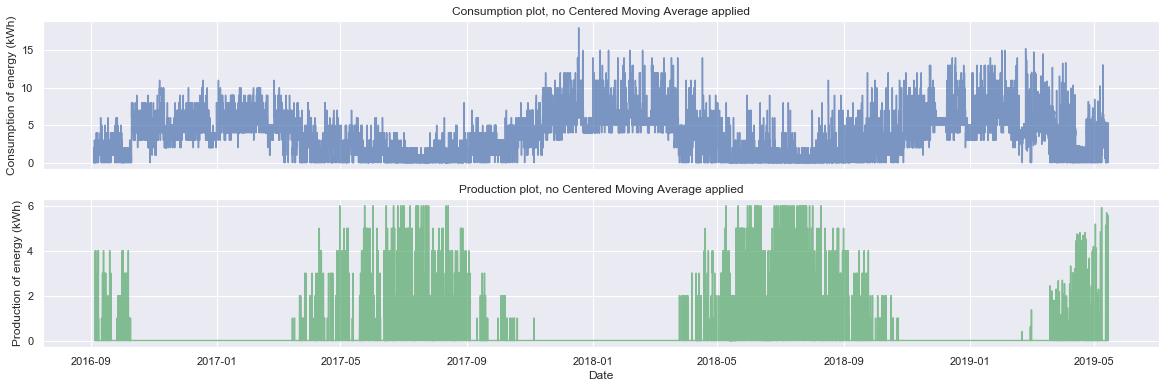

In [180]:
plt.rcParams["figure.figsize"] = (20,6)
plt.rc('axes', titlesize=16)
sns.set(style="darkgrid")

fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols = 1, sharex=True)
ax1.plot(moving_average(df_cons['num_kwh'],1).sort_index(), color='b', alpha=0.7)
ax1.title.set_text('Consumption plot, no Centered Moving Average applied')
ax1.set_ylabel('Consumption of energy (kWh)')

ax2.plot(moving_average(df_prod['num_kwh'],1).sort_index(), color='g', alpha=0.7)
ax2.title.set_text('Production plot, no Centered Moving Average applied')
ax2.set_ylabel('Production of energy (kWh)')

plt.xlabel('Date')
plt.show()

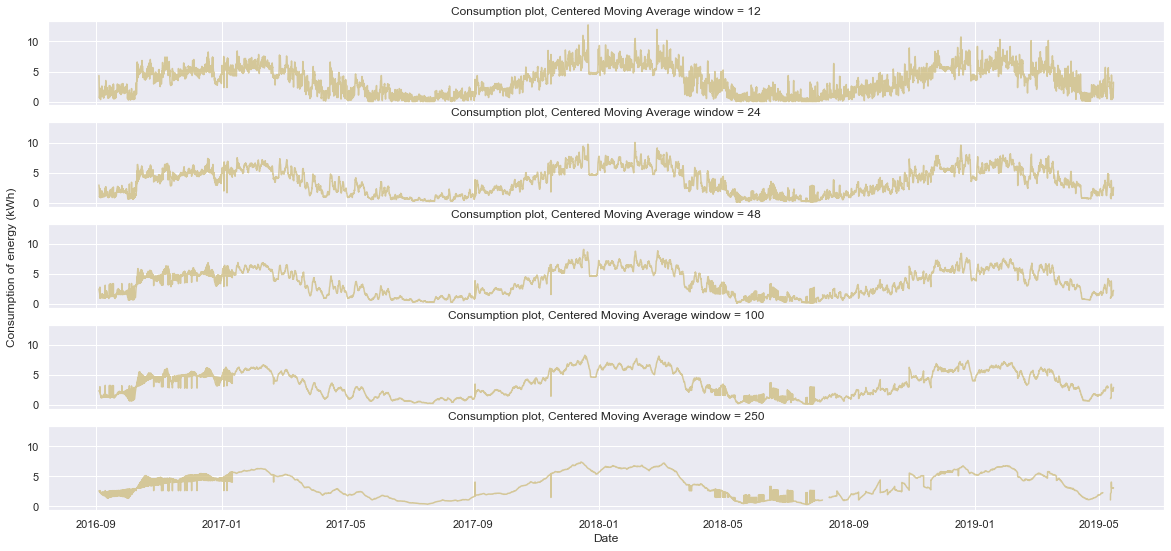

In [199]:
plt.rcParams["figure.figsize"] = (20,9)
sns.set(style="darkgrid")

fig, ((ax1),(ax2), (ax3), (ax4), (ax5)) = plt.subplots(nrows=5, ncols = 1, sharex=True, sharey=True)

ax1.plot(moving_average(df_cons['num_kwh'],12).sort_index(), color='y', alpha=0.7)
ax1.title.set_text('Consumption plot, Centered Moving Average window = 12')

ax2.plot(moving_average(df_cons['num_kwh'],24).sort_index(), color='y', alpha=0.7)
ax2.title.set_text('Consumption plot, Centered Moving Average window = 24')

ax3.plot(moving_average(df_cons['num_kwh'],48).sort_index(), color='y', alpha=0.7)
ax3.title.set_text('Consumption plot, Centered Moving Average window = 48')

ax4.plot(moving_average(df_cons['num_kwh'],100).sort_index(), color='y', alpha=0.7)
ax4.title.set_text('Consumption plot, Centered Moving Average window = 100')

ax5.plot(moving_average(df_cons['num_kwh'],350).sort_index(), color='y', alpha=0.7)
ax5.title.set_text('Consumption plot, Centered Moving Average window = 250')

fig.text(.1, .5, 'Consumption of energy (kWh)', ha='center', va='center', rotation='vertical')
plt.xlabel('Date')
plt.show()